In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df=pd.read_csv("C:/Users/HP/Desktop/IMARTICUS/ML/New folder/Data Science Projects/ZeroToHero/DataSets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,33,1


# Data Preparation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             767 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               1
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

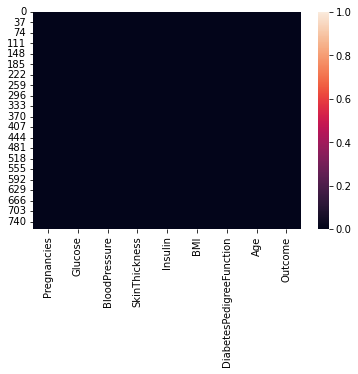

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

# EDA

In [9]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

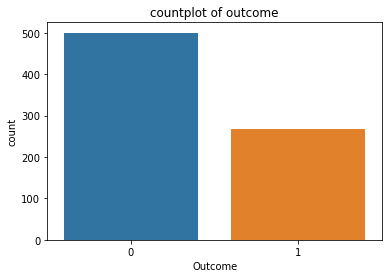

In [10]:
sns.countplot(df.Outcome)
plt.title('countplot of outcome')
plt.show()

# splitting the data

In [14]:
x=df.loc[:,df.columns!='Outcome']     # only predictors 
y=df.loc[:,df.columns=='Outcome']     # only target 

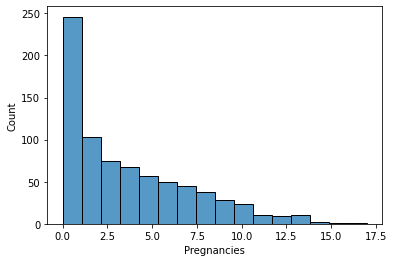

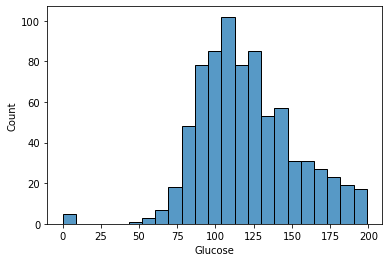

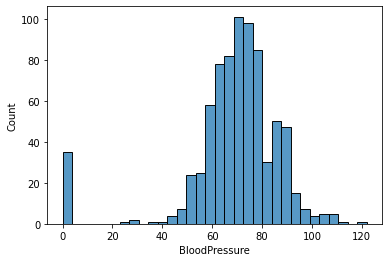

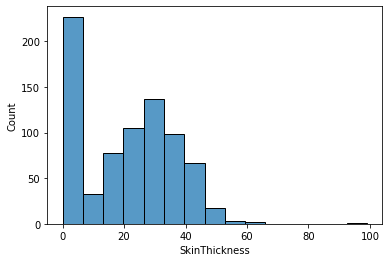

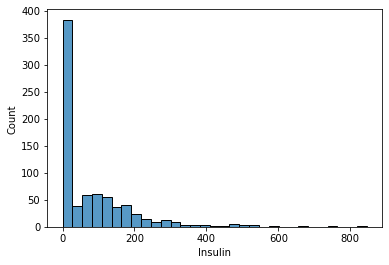

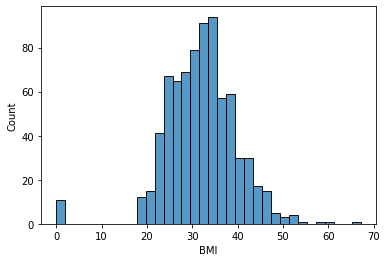

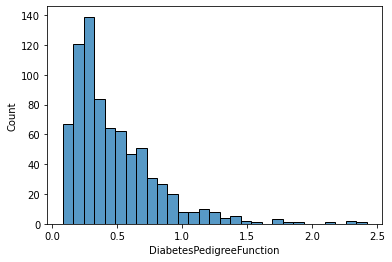

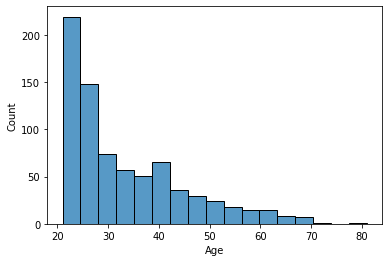

In [15]:
for i in x.columns:
    sns.histplot(df[i])
    plt.show()

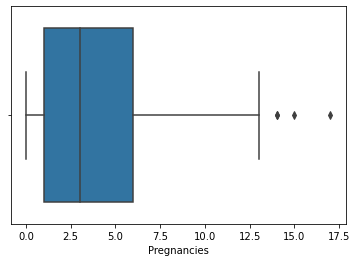

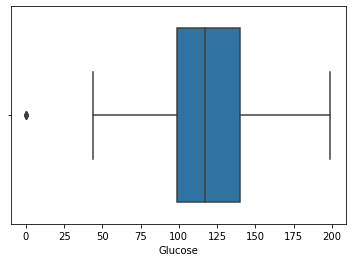

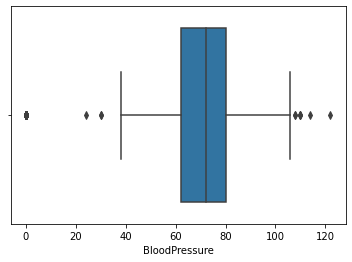

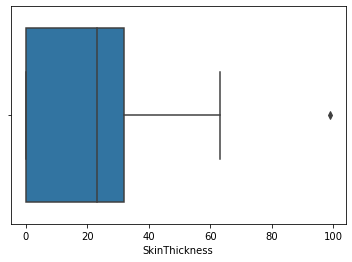

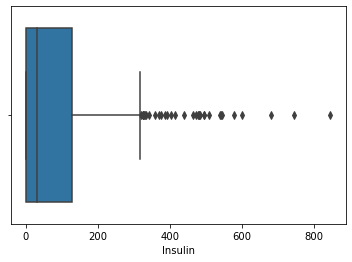

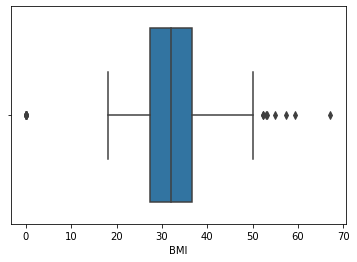

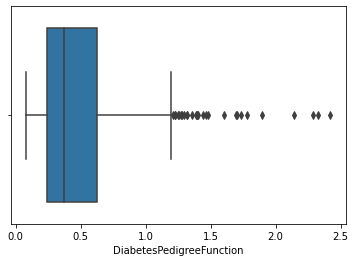

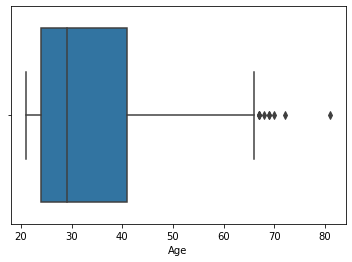

In [19]:
for i in x.columns:
    sns.boxplot(df[i])
    plt.show()

In [20]:
df[df.SkinThickness>90]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70.0,99,0,34.7,0.575,62,1


# There is only one data which has extreme outlier so  drop that record

In [21]:
df.drop(579,inplace=True)

<AxesSubplot:>

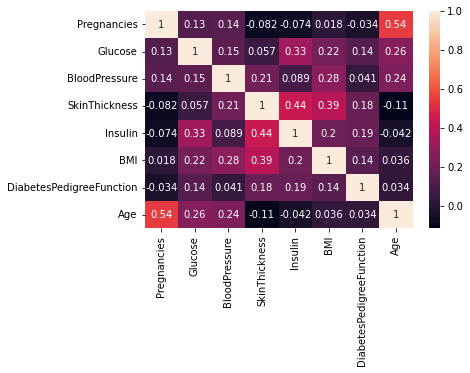

In [17]:
sns.heatmap(x.corr(),annot=True)

In [18]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
from scipy.stats import ttest_ind

print('Good predictors with p-value :','\n')
GoodPredictors=[]
for i in x.columns:
    a=df[df.Outcome==0]
    b=df[df.Outcome==1]
    test=ttest_ind(a[i],b[i])
    if test.pvalue<0.05:
        print(i,'\n','p-value =',test.pvalue,'\n\n')
        GoodPredictors.append(i)
print('GoodPredictors=',GoodPredictors)

Good predictors with p-value : 

Pregnancies 
 p-value = 4.102032518938751e-10 


Glucose 
 p-value = 2.471726904019901e-42 


Insulin 
 p-value = 0.00024700685929888414 


BMI 
 p-value = 1.36371862134616e-16 


DiabetesPedigreeFunction 
 p-value = 1.3365648768047684e-06 


Age 
 p-value = 4.2232485254965214e-11 


GoodPredictors= ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [20]:
print('BAD predictors with p-value :','\n')
BADPredictors=[]
for i in x.columns:
    a=df[df.Outcome==0]
    b=df[df.Outcome==1]
    test=ttest_ind(a[i],b[i])
    if test.pvalue>0.05:
        print(i,'\n','p-value =',test.pvalue,'\n\n')
        BADPredictors.append(i)
print('BADPredictors=',BADPredictors)

BAD predictors with p-value : 

BloodPressure 
 p-value = 0.07171277101453302 


SkinThickness 
 p-value = 0.06311365760797047 


BADPredictors= ['BloodPressure', 'SkinThickness']


In [21]:
x=df[GoodPredictors]
y=df['Outcome']

In [22]:
x.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33


In [23]:
y.value_counts()

0    500
1    267
Name: Outcome, dtype: int64

# Will perform SMOTE operation
Because their is an imbalance in the target variable so will perform oversampling for the value which are less

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)


In [26]:
train=pd.concat([x_train,y_train],axis=1)

In [27]:
train.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
604,4,183,0,28.4,0.212,36,1
118,4,97,0,28.2,0.443,22,0
247,0,165,680,52.3,0.427,23,0
157,1,109,135,25.2,0.833,23,0
468,8,120,0,30.0,0.183,38,1


In [28]:
not_subsc=train[train.Outcome==0]
print('not_subsc',len(not_subsc))
subsc=train[train.Outcome==1]
print('subsc',len(subsc))

not_subsc 392
subsc 221


In [29]:
from sklearn.utils import resample
subsc_os=resample(subsc,replace=True,n_samples=len(not_subsc),random_state=0)

In [30]:
len(subsc_os)

392

In [31]:
train_os=pd.concat([not_subsc,subsc_os])

In [32]:
len(train_os[train_os.Outcome==0])

392

In [33]:
len(train_os[train_os.Outcome==1])

392

In [34]:
train_os.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
118,4,97,0,28.2,0.443,22,0
247,0,165,680,52.3,0.427,23,0
157,1,109,135,25.2,0.833,23,0
97,1,71,76,20.4,0.323,22,0
530,2,122,106,29.8,0.717,22,0


In [35]:
x_trainos=train_os.loc[:,train_os.columns!='Outcome']            # only predictors
y_trainos=train_os.loc[:,train_os.columns=='Outcome']  

In [36]:
from sklearn.tree import DecisionTreeClassifier

DTC=DecisionTreeClassifier()
DTCFIT=DTC.fit(x_trainos,y_trainos)
DTCFIT

DecisionTreeClassifier()

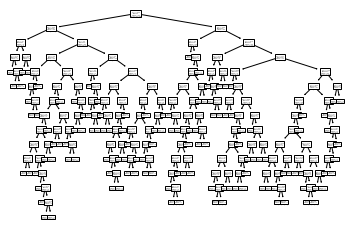

In [37]:
from sklearn import tree
tree.plot_tree(DTC.fit(x_trainos,y_trainos))
plt.show()

In [38]:
y_predDTC=DTC.predict(x_test)
y_predDTC

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
      dtype=int64)

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predDTC)

array([[93, 15],
       [20, 26]], dtype=int64)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predDTC))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       108
           1       0.63      0.57      0.60        46

    accuracy                           0.77       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.77      0.77      0.77       154



In [41]:
from sklearn.metrics import accuracy_score
as_DTC=accuracy_score(y_test,y_predDTC)
as_DTC

0.7727272727272727

In [42]:
predict_proba_DTC=DTCFIT.predict_proba(x_test)[:,1]

In [43]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr_DTC,tpr_DTC,thresholds=metrics.roc_curve(y_test,predict_proba_DTC)

In [44]:
fpr_DTC

array([0.        , 0.13888889, 1.        ])

In [45]:
tpr_DTC

array([0.        , 0.56521739, 1.        ])

In [46]:
auc_DTC=auc(fpr_DTC,tpr_DTC)
auc_DTC

0.7131642512077294

<Figure size 720x1440 with 0 Axes>

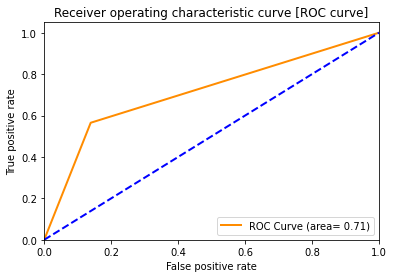

In [47]:
plt.figure(figsize=(10,20))
plt.figure()
lw=2
plt.plot(fpr_DTC,tpr_DTC,color='darkorange',lw=lw,label='ROC Curve (area= %0.2f)'%auc_DTC)
plt.plot([0,1],[0,1],'b--',lw=lw)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic curve [ROC curve]')
plt.legend(loc='lower right')
plt.show()

# Bagging

In [48]:
from sklearn.ensemble import BaggingClassifier

In [49]:
bc=BaggingClassifier(base_estimator=DTC,n_estimators=300,bootstrap=True,n_jobs=-1,oob_score=True)
bc.fit(x_trainos,y_trainos)
y_predB=bc.predict(x_test)

In [50]:
pd.crosstab(y_test,y_predB,margins=True,rownames=['Actual'],colnames=['Predict'])

Predict,0,1,All
Actual,,,
0,93,15,108
1,11,35,46
All,104,50,154


In [51]:
print(classification_report(y_test,y_predB))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       108
           1       0.70      0.76      0.73        46

    accuracy                           0.83       154
   macro avg       0.80      0.81      0.80       154
weighted avg       0.84      0.83      0.83       154



In [52]:
probPB=bc.predict_proba(x_test)[:,1]

In [53]:
from sklearn import metrics 
fprPB,tprPB,thresholdPB=metrics.roc_curve(y_test,probPB)

In [54]:
aucPB=auc(fprPB,tprPB)
aucPB

0.8839573268921095

<Figure size 720x1440 with 0 Axes>

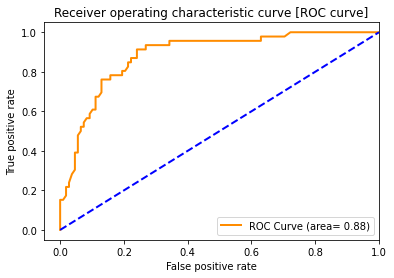

In [55]:
plt.figure(figsize=(10,20))
plt.figure()
lw=2
plt.plot(fprPB,tprPB,color='darkorange',lw=lw,label='ROC Curve (area= %0.2f)'%aucPB)
plt.plot([0,1],[0,1],'b--',lw=lw)
plt.xlim([-0.05,1.0])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic curve [ROC curve]')
plt.legend(loc='lower right')
plt.show()

# Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

RFC=RandomForestClassifier(max_features='sqrt')
RFCFit=RFC.fit(x_trainos,y_trainos)

In [57]:
y_predRF=RFC.predict(x_test)

In [58]:
pd.crosstab(y_test,y_predRF,margins=True,rownames=['Actual'],colnames=['Predict'])

Predict,0,1,All
Actual,,,
0,94,14,108
1,12,34,46
All,106,48,154


In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_test,y_predRF))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       108
           1       0.71      0.74      0.72        46

    accuracy                           0.83       154
   macro avg       0.80      0.80      0.80       154
weighted avg       0.83      0.83      0.83       154



In [61]:
probRF=RFCFit.predict_proba(x_test)[:,1]

In [62]:
fprRF,tprRF,thresholds=metrics.roc_curve(y_test,probRF)

In [63]:
aucRF=auc(fprRF,tprRF)
aucRF

0.8897946859903382

<Figure size 720x1440 with 0 Axes>

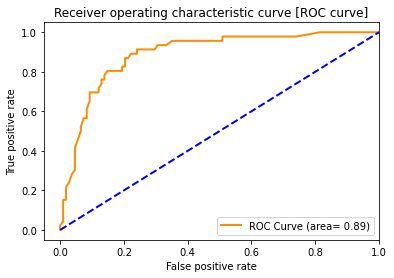

In [64]:
plt.figure(figsize=(10,20))
plt.figure()
lw=2
plt.plot(fprRF,tprRF,color='darkorange',lw=lw,label='ROC Curve (area= %0.2f)'%aucRF)
plt.plot([0,1],[0,1],'b--',lw=lw)
plt.xlim([-0.05,1.0])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic curve [ROC curve]')
plt.legend(loc='lower right')
plt.show()

# Importance of Variables

In [65]:
fi=pd.DataFrame({'features':list(x_train.columns),'importance':RFCFit.feature_importances_}).sort_values('importance',ascending=False)
fi

,features,importance
1,Glucose,0.302039
3,BMI,0.201674
5,Age,0.172943
4,DiabetesPedigreeFunction,0.162403
0,Pregnancies,0.080878
2,Insulin,0.080063


# Gradient Boosting Classifier

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

GBC=GradientBoostingClassifier()
GBCFIT=GBC.fit(x_trainos,y_trainos)
pred_GB=GBC.predict(x_test)

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred_GB)

array([[90, 18],
       [ 9, 37]], dtype=int64)

In [68]:
pd.crosstab(y_test,pred_GB,margins=True,rownames=['Actual'],colnames=['predict'])

predict,0,1,All
Actual,,,
0,90,18,108
1,9,37,46
All,99,55,154


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_GB))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       108
           1       0.67      0.80      0.73        46

    accuracy                           0.82       154
   macro avg       0.79      0.82      0.80       154
weighted avg       0.84      0.82      0.83       154



In [70]:
GB_prob=GBCFIT.predict_proba(x_test)[:,1]

In [71]:
fprGBC,tprGBC,thresholdGBC=metrics.roc_curve(y_test,GB_prob)

In [72]:
aucGBC=auc(fprGBC,tprGBC)
aucGBC

0.8886876006441223

<Figure size 720x1440 with 0 Axes>

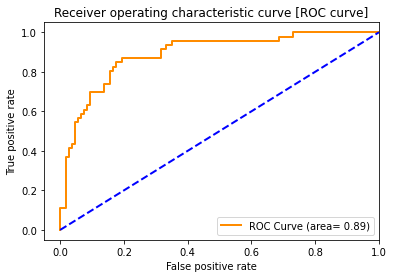

In [73]:
plt.figure(figsize=(10,20))
plt.figure()
lw=2
plt.plot(fprGBC,tprGBC,color='darkorange',lw=lw,label='ROC Curve (area= %0.2f)'%aucGBC)
plt.plot([0,1],[0,1],'b--',lw=lw)
plt.xlim([-0.05,1.0])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic curve [ROC curve]')
plt.legend(loc='lower right')
plt.show()

# Adaptive Boosting Classifier

In [74]:
from sklearn.ensemble import AdaBoostClassifier
Ada=AdaBoostClassifier(base_estimator=DTC,n_estimators=200)

In [75]:
AdaFit=Ada.fit(x_trainos,y_trainos)
Ada_predict=Ada.predict(x_test)
Ada_predict

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1],
      dtype=int64)

In [76]:
pd.crosstab(y_test,Ada_predict,margins=True,rownames=['Actual'],colnames=['Predict'])

Predict,0,1,All
Actual,,,
0,91,17,108
1,18,28,46
All,109,45,154


In [77]:
print(classification_report(y_test,Ada_predict))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       108
           1       0.62      0.61      0.62        46

    accuracy                           0.77       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.77      0.77      0.77       154



In [78]:
Ada_prob=AdaFit.predict_proba(x_test)[:,1]
Ada_prob

array([2.22044605e-16, 2.22044605e-16, 2.22044605e-16, 1.00000000e+00,
       2.22044605e-16, 2.22044605e-16, 1.00000000e+00, 2.22044605e-16,
       2.22044605e-16, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       2.22044605e-16, 2.22044605e-16, 2.22044605e-16, 1.00000000e+00,
       1.00000000e+00, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16,
       2.22044605e-16, 2.22044605e-16, 1.00000000e+00, 2.22044605e-16,
       2.22044605e-16, 1.00000000e+00, 2.22044605e-16, 1.00000000e+00,
       2.22044605e-16, 2.22044605e-16, 1.00000000e+00, 2.22044605e-16,
       2.22044605e-16, 1.00000000e+00, 2.22044605e-16, 1.00000000e+00,
       2.22044605e-16, 2.22044605e-16, 2.22044605e-16, 1.00000000e+00,
       2.22044605e-16, 2.22044605e-16, 2.22044605e-16, 1.00000000e+00,
       2.22044605e-16, 2.22044605e-16, 2.22044605e-16, 1.00000000e+00,
       2.22044605e-16, 2.22044605e-16, 1.00000000e+00, 2.22044605e-16,
       2.22044605e-16, 2.22044605e-16, 2.22044605e-16, 2.22044605e-16,
      

In [79]:
fpr_Ada,tpr_Ada,threshold_Ada=metrics.roc_curve(y_test,Ada_prob)

In [80]:
auc_Ada=auc(fpr_Ada,tpr_Ada)
auc_Ada

0.7256441223832528

<Figure size 720x1440 with 0 Axes>

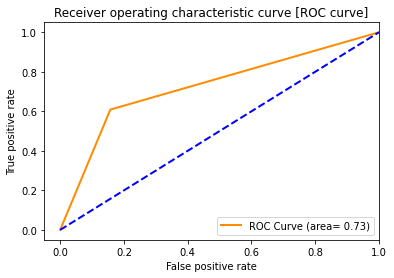

In [81]:
plt.figure(figsize=(10,20))
plt.figure()
lw=2
plt.plot(fpr_Ada,tpr_Ada,color='darkorange',lw=lw,label='ROC Curve (area= %0.2f)'%auc_Ada)
plt.plot([0,1],[0,1],'b--',lw=lw)
plt.xlim([-0.05,1.0])
plt.ylim([-0.05,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic curve [ROC curve]')
plt.legend(loc='lower right')
plt.show()